In [ ]:
# 김치수출액(단위 : 천불) : export_value
# 김치 수출량(단위 : 톤) : export_volume
# 김치 수입액(단위 : 천불) : import_value
# 김치 수입량(단위 : 톤) : import_volume

# 품목별생산자물가지수 : producer_price_index
# 항목별소비자물가지수 : consumer_price_index

# 면적 : area
# 생산량(단위:천ha,천t) : production_volume
# 채소류 1인당 연간 소비량(단위:kg) : consumption
# 수출(단위 :톤) : export
# 수입(단위 :톤) : import

In [13]:
import pandas as pd

agro_data = pd.read_csv('../data/agromarket_climate.csv')
kimchi_data = pd.read_csv('../data/raw/kimchi.csv')
price_index_data = pd.read_csv('../data/raw/price_index.csv')
production_data = pd.read_csv('../data/raw/production_volume.csv')

# 배추 데이터 필터링
baechu_data = agro_data[agro_data['item'] == '배추']

print(baechu_data.head())
print(kimchi_data.head())
print(price_index_data.head())
print(production_data.head())


           date  year  month  day season region wholesale_market category  \
28   2019-02-01  2019      2    1     겨울     강릉               강릉     엽경채류   
29   2019-02-01  2019      2    1     겨울     강릉               강릉     엽경채류   
81   2019-01-31  2019      1   31     겨울     강릉               강릉     엽경채류   
82   2019-01-31  2019      1   31     겨울     강릉               강릉     엽경채류   
132  2019-01-30  2019      1   30     겨울     강릉               강릉     엽경채류   

    item  quantity_kg  ...  avg_temp  min_temp  max_temp  daily_rainfall  \
28    배추          4.0  ...       0.3      -3.9       4.6             0.0   
29    배추      11220.0  ...       0.3      -3.9       4.6             0.0   
81    배추         12.0  ...       2.4      -2.3       7.7            13.0   
82    배추          8.0  ...       2.4      -2.3       7.7            13.0   
132   배추         22.0  ...       8.3       5.0      13.7             0.0   

     max_wind  avg_wind  avg_humidity  avg_pressure  sunshine_hours  \
28       

In [14]:
print(production_data.columns)

Index(['year', 'area', 'production_volume', 'consumption', 'export', 'import'], dtype='object')


In [15]:
# 김치 데이터 병합
baechu_with_kimchi = pd.merge(
    baechu_data,
    kimchi_data.rename(columns={
        '김치수출액(단위 : 천불)': 'export_value',
        '김치 수출량(단위 : 톤)': 'export_volume',
        '김치 수입액(단위 : 천불)': 'import_value',
        '김치 수입량(단위 : 톤)': 'import_volume'
    }),
    on=['year', 'month'],
    how='left'
)

# 물가지수 데이터 병합
baechu_with_price_index = pd.merge(
    baechu_with_kimchi,
    price_index_data.rename(columns={
        '품목별생산자물가지수': 'producer_price_index',
        '항목별소비자물가지수': 'consumer_price_index'
    }),
    on=['year', 'month'],
    how='left'
)

# 생산량 데이터 병합
final_data = pd.merge(
    baechu_with_price_index,
    production_data.rename(columns={
        '면적': 'area',
        '생산량(단위:천ha,천t)': 'production_volume',
        '채소류 1인당 연간 소비량(단위:kg)': 'consumption',
        '수출(단위 :톤)': 'export',
        '수입(단위 :톤)': 'import'
    }),
    on='year',  # year 기준 병합
    how='left'
)

# 병합 결과 확인
print(final_data.head())


         date  year  month  day season region wholesale_market category item  \
0  2019-02-01  2019      2    1     겨울     강릉               강릉     엽경채류   배추   
1  2019-02-01  2019      2    1     겨울     강릉               강릉     엽경채류   배추   
2  2019-01-31  2019      1   31     겨울     강릉               강릉     엽경채류   배추   
3  2019-01-31  2019      1   31     겨울     강릉               강릉     엽경채류   배추   
4  2019-01-30  2019      1   30     겨울     강릉               강릉     엽경채류   배추   

   quantity_kg  ...  export_volume  import_value  import_volume  \
0          4.0  ...         2179.0        8067.0        20604.0   
1      11220.0  ...         2179.0        8067.0        20604.0   
2         12.0  ...         2559.0       11236.0        28335.0   
3          8.0  ...         2559.0       11236.0        28335.0   
4         22.0  ...         2559.0       11236.0        28335.0   

   producer_price_index  consumer_price_index  area  production_volume  \
0                 63.15                47.

In [16]:
print(final_data.dtypes)

date                      object
year                       int64
month                      int64
day                        int64
season                    object
region                    object
wholesale_market          object
category                  object
item                      object
quantity_kg              float64
price_won                float64
unit_price_per_kg        float64
avg_quantity_kg          float64
avg_price_won            float64
avg_unit_price_per_kg    float64
avg_temp                 float64
min_temp                 float64
max_temp                 float64
daily_rainfall           float64
max_wind                 float64
avg_wind                 float64
avg_humidity             float64
avg_pressure             float64
sunshine_hours           float64
max_snow_depth           float64
export_value             float64
export_volume            float64
import_value             float64
import_volume            float64
producer_price_index     float64
consumer_p

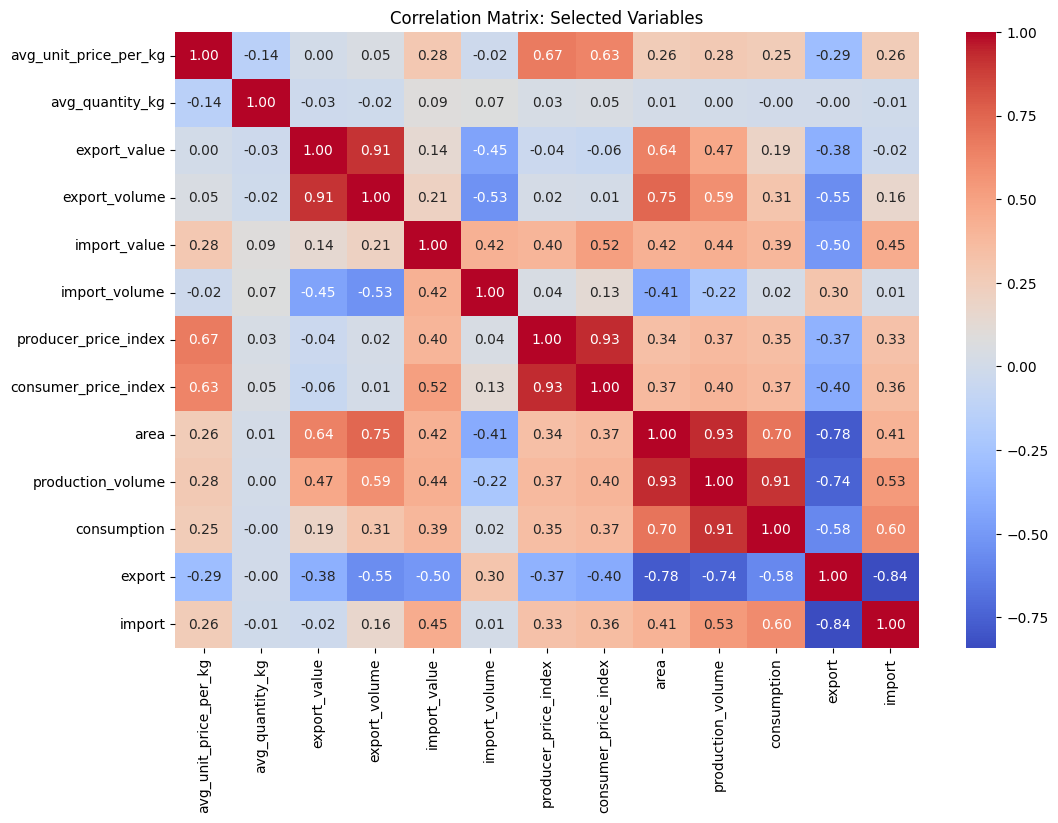

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = [
    'avg_unit_price_per_kg', 'avg_quantity_kg', 'export_value', 'export_volume',
    'import_value', 'import_volume', 'producer_price_index',
    'consumer_price_index', 'area', 'production_volume', 'consumption',
    'export', 'import'
]

# 숫자형 데이터 필터링
filtered_data = final_data[selected_columns].dropna()

# 상관관계 계산
correlation_matrix = filtered_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Selected Variables")
plt.show()

In [21]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

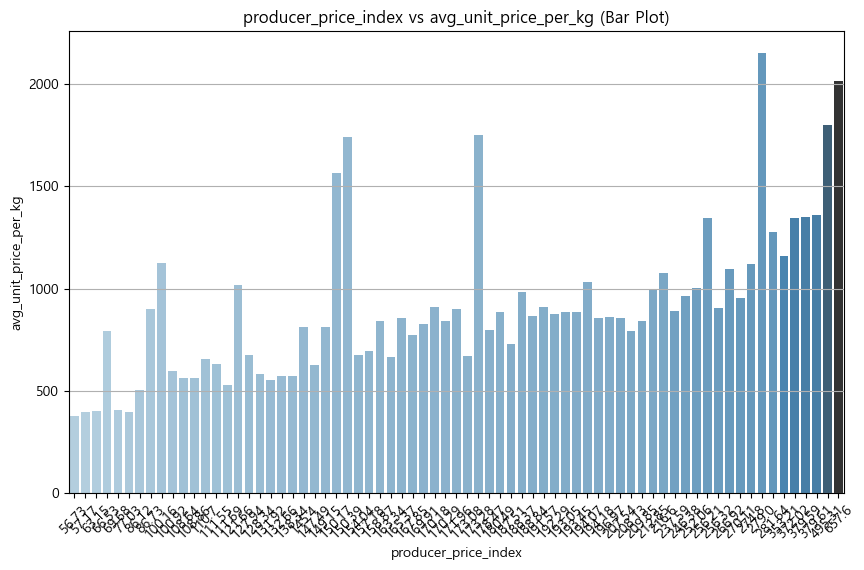

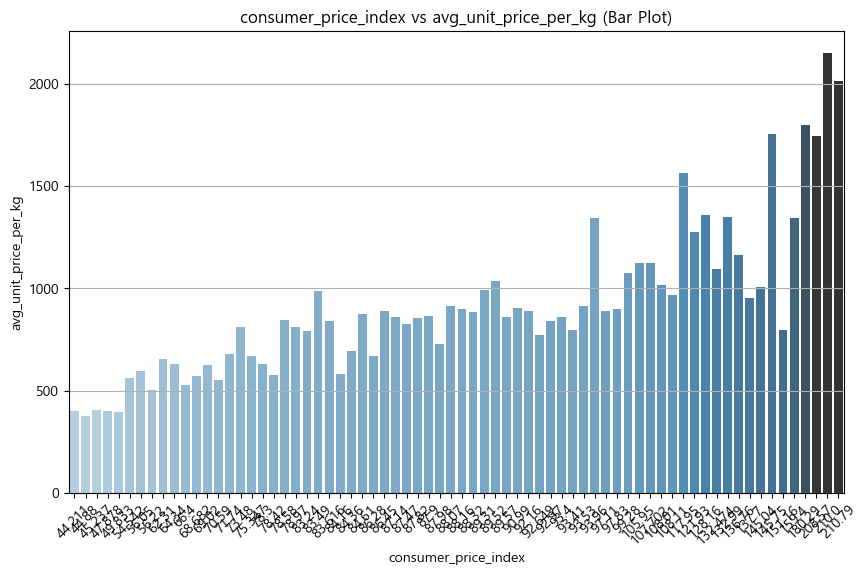

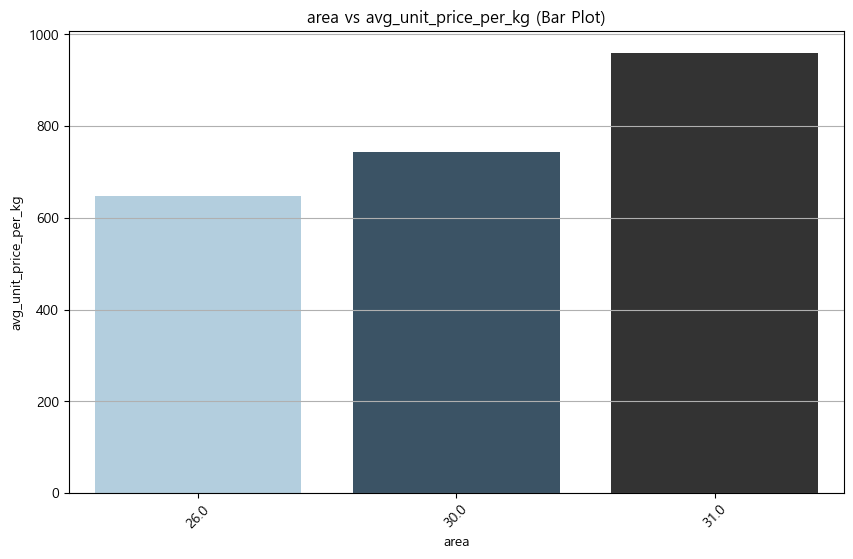

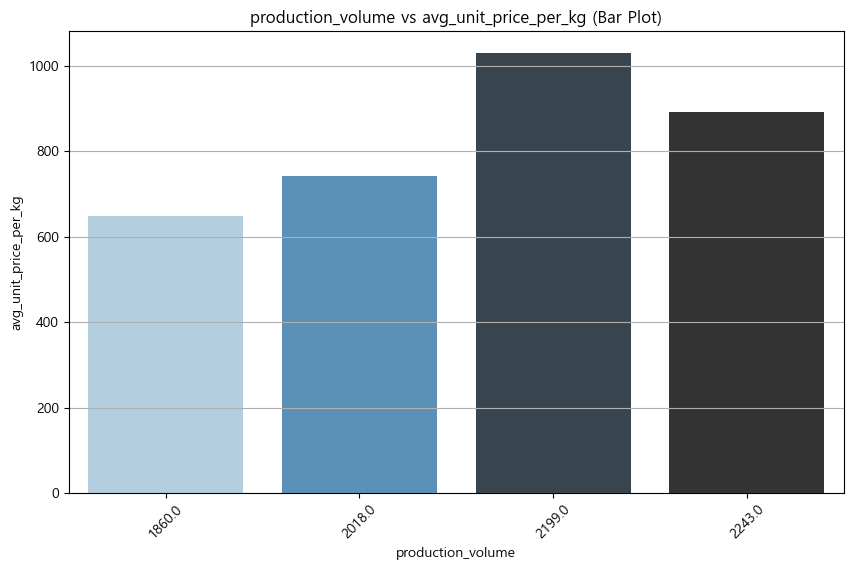

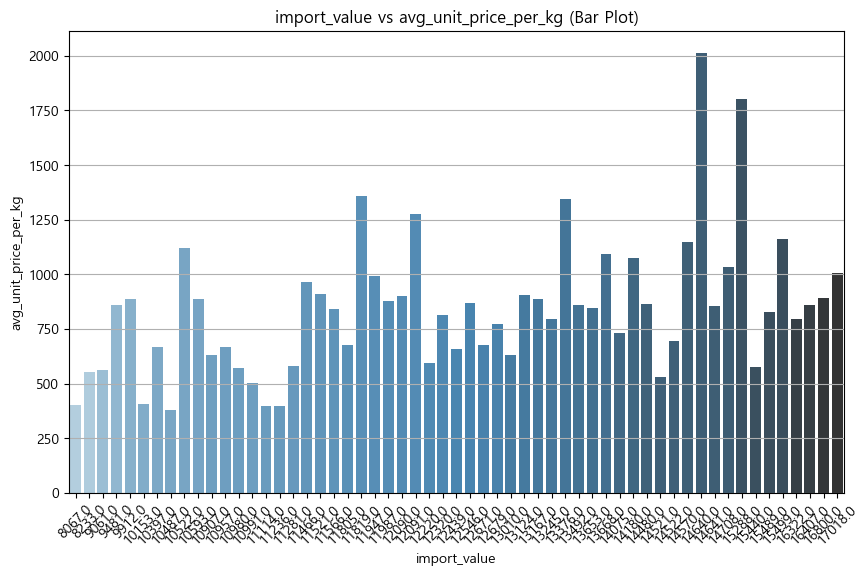

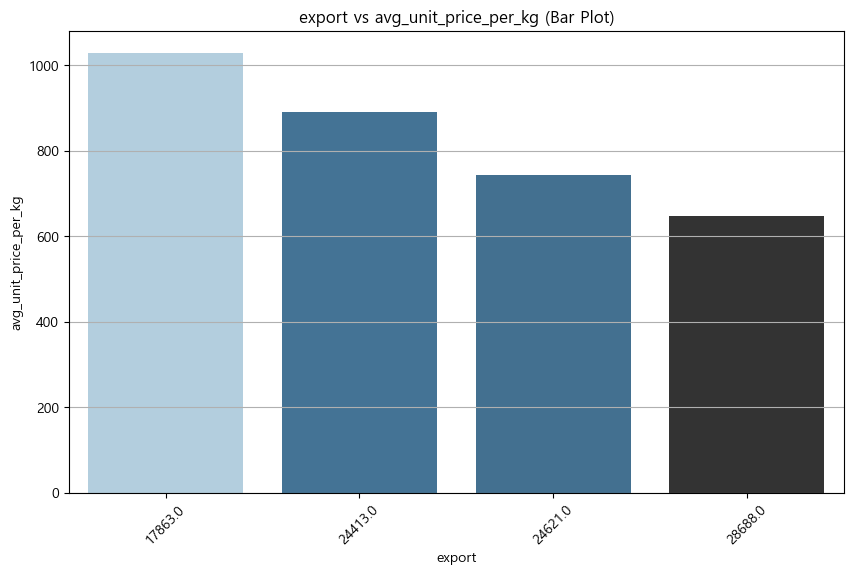

In [27]:
# 주요 변수와 avg_unit_price_per_kg 간의 관계를 바플롯으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에서 avg_unit_price_per_kg와 관련 변수들만 사용
columns_to_visualize = ['producer_price_index', 'consumer_price_index', 'area', 'production_volume', 'import_value', 'export']

# 바플롯
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=final_data[column], 
                y=final_data['avg_unit_price_per_kg'], 
                errorbar=None,  
                hue=final_data[column],  
                dodge=False,  
                palette="Blues_d")
    plt.title(f"{column} vs avg_unit_price_per_kg (Bar Plot)")
    plt.xlabel(column)
    plt.ylabel("avg_unit_price_per_kg")
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False) 
    plt.grid(axis='y')
    plt.show()


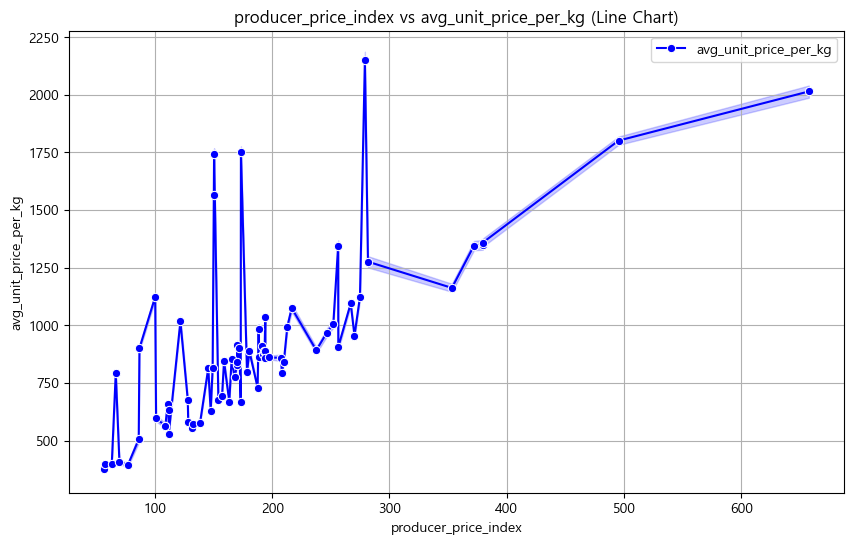

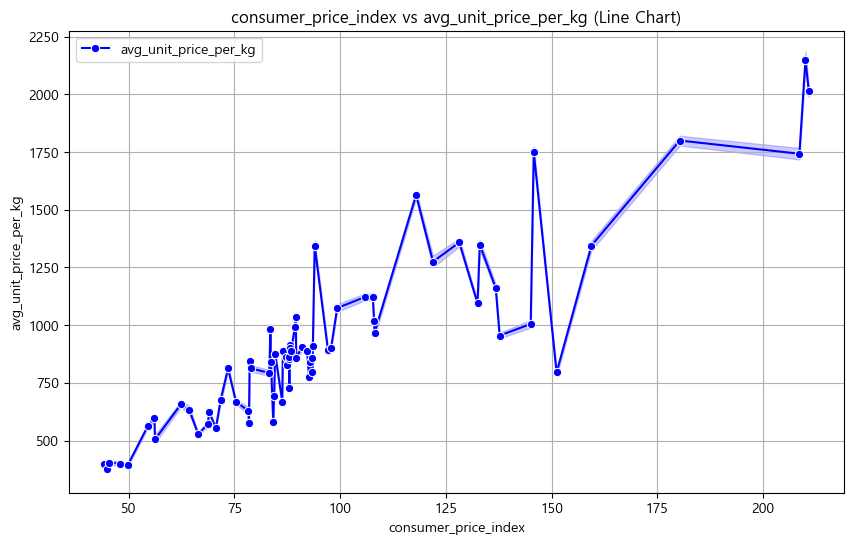

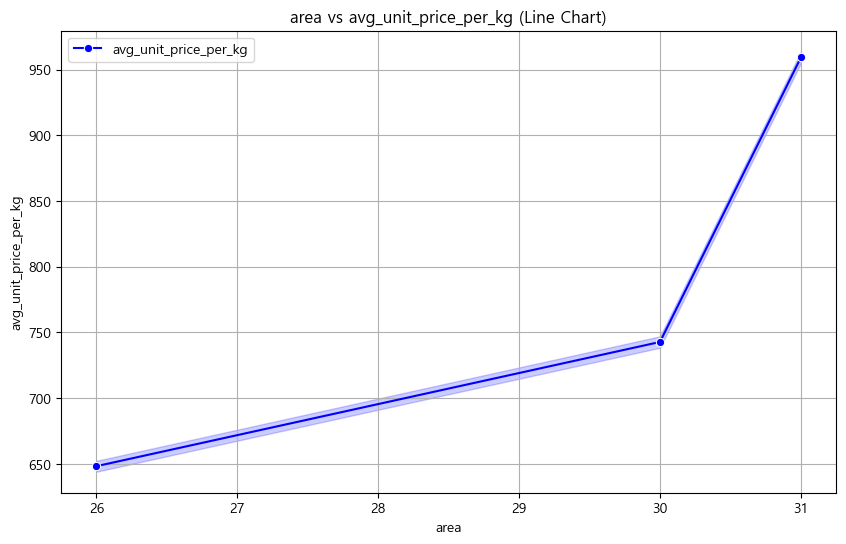

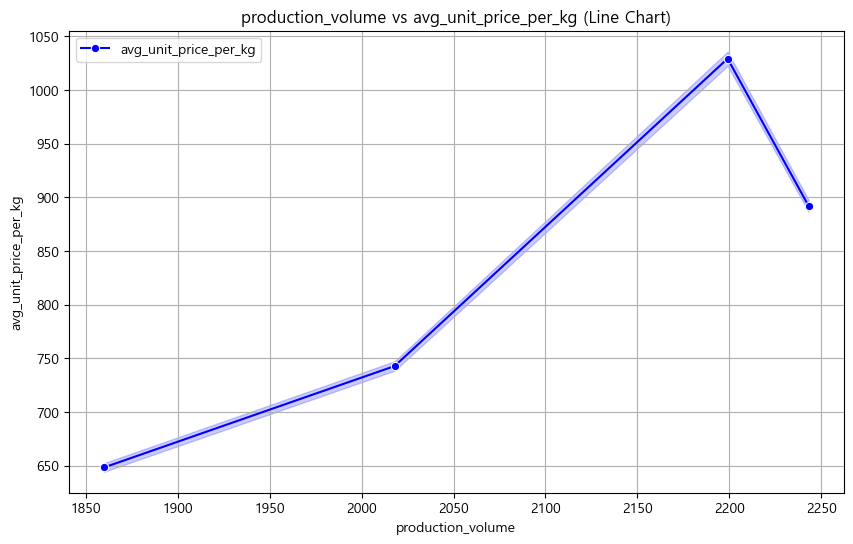

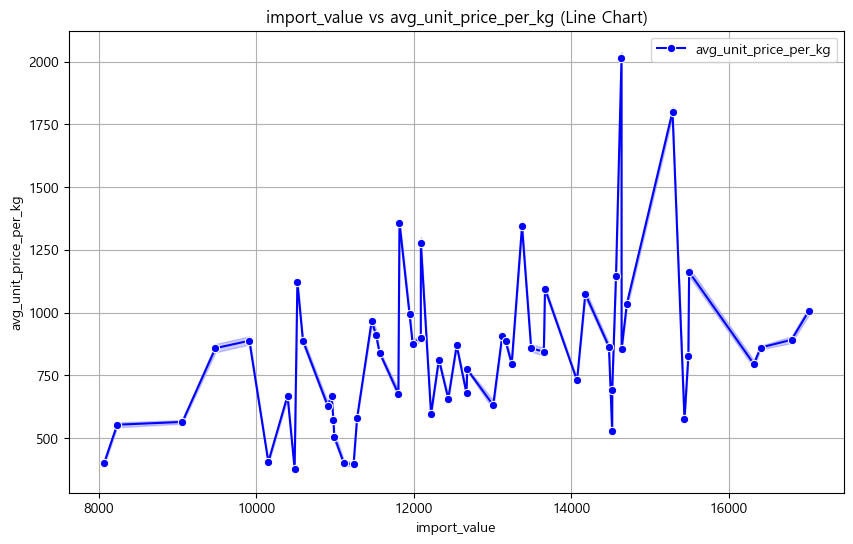

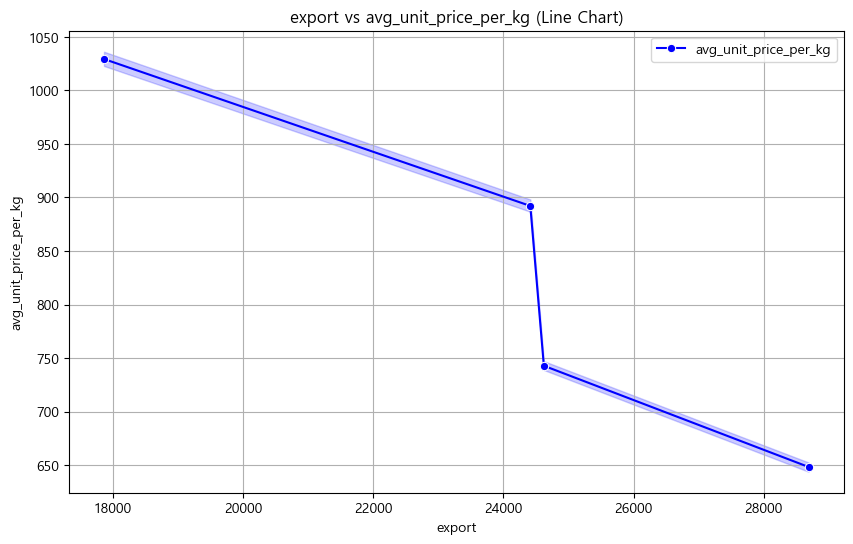

In [29]:
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=final_data[column], y=final_data['avg_unit_price_per_kg'], marker='o', color='blue', label='avg_unit_price_per_kg')
    plt.title(f"{column} vs avg_unit_price_per_kg (Line Chart)")
    plt.xlabel(column)
    plt.ylabel("avg_unit_price_per_kg")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# 배추 단가와 김치 수입액, 수입량 간 상관관계 계산
correlation_import_value = final_data[['avg_unit_price_per_kg', 'import_value', 'export_value']].corr()
correlation_import_volume = final_data[['avg_unit_price_per_kg', 'import_volume', 'export_volume']].corr()

print("배추 단가와 김치 수입액, 수출액 상관관계:")
print(correlation_import_value)

print("\n배추 단가와 김치 수입량, 수출량 상관관계:")
print(correlation_import_volume)


배추 단가와 김치 수입액 상관관계:
                       avg_unit_price_per_kg  import_value  export_value
avg_unit_price_per_kg               1.000000      0.272903      0.018443
import_value                        0.272903      1.000000      0.180354
export_value                        0.018443      0.180354      1.000000

배추 단가와 김치 수입량 상관관계:
                       avg_unit_price_per_kg  import_volume  export_volume
avg_unit_price_per_kg               1.000000      -0.015419       0.059305
import_volume                      -0.015419       1.000000      -0.442315
export_volume                       0.059305      -0.442315       1.000000
